In [483]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install ydata_profiling

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
                   ...    
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
is_train          0.000000
Length: 76, dtype: float64

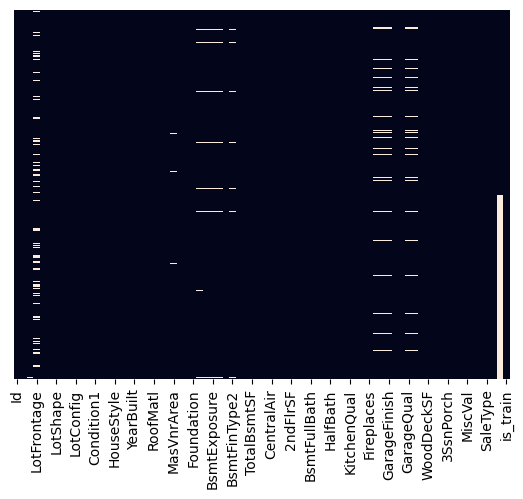

In [521]:
train_df=pd.read_csv('train.csv').drop(['PoolQC','MiscFeature','Alley','MasVnrType','FireplaceQu','Fence'],axis=1)
train_df.head()
test_df= pd.read_csv('test.csv').drop(['PoolQC','MiscFeature','Alley','MasVnrType','FireplaceQu','Fence'],axis=1)
test_ids= test['Id']
train_df["is_train"] = 1
test_df["is_train"] = 0
combined_df = pd.concat([train_df, test_df], ignore_index=True)
# test['MSZoning']= test['MSZoning'].fillna(test['MSZoning'].mode()[0])
# test['LotFrontage']= test['LotFrontage'].fillna(test['LotFrontage'].mean())
# test['GarageQual']= test['GarageQual'].fillna(test['GarageQual'].mode()[0])
# test['GarageFinish']= test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
sns.heatmap(combined_df.isnull(),yticklabels=False,cbar=False)
combined_df.isnull().mean()*100

In [487]:
# from ydata_profiling import ProfileReport
# Report= ProfileReport(df)
# Report.to_file(output_file='Report.html')

In [489]:
#df.drop(columns=['Policy Start Date'],axis=1,inplace=True)


In [523]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OneHotEncoder,PowerTransformer,MinMaxScaler,OrdinalEncoder
from sklearn.impute import KNNImputer,SimpleImputer,IterativeImputer

In [525]:
numerical_pipeline= make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler(),
    PowerTransformer()
)
categorical_pipeline1= make_pipeline(
    OneHotEncoder(sparse_output=False, drop='first'),
    MinMaxScaler(),
    SimpleImputer(strategy='most_frequent')
     
)
# categorical_pipeline2= make_pipeline(
#     OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1,categories=[['High School','''Bachelor's''','PhD','''Master's'''],['Poor','Average','Good']]),
#    # IterativeImputer(max_iter=20, random_state=0)
#     MinMaxScaler()
#)

In [495]:
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric Column Names:", numeric_columns)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Column Names:", categorical_columns)

Numeric Column Names: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical Column Names: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'Bs

In [527]:
Preprocessor= make_column_transformer( 
    (numerical_pipeline,[ 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']),
    (categorical_pipeline1,['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd',  'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional',  'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']),
    
    remainder='passthrough')

In [541]:
x= combined_df.drop(['SalePrice'],axis=1)
y= combined_df[['SalePrice','is_train']]

In [543]:

# MinMax_encoder= MinMaxScaler()
# y2 = MinMax_encoder.fit_transform(y)
# Power_Transformer=PowerTransformer()
# y3 = Power_Transformer.fit_transform(y2)
# y4= pd.DataFrame(y3).fillna(-1)
# Simple_imputer = SimpleImputer(strategy= 'mean')
# y4 = Simple_imputer.fit_transform(y2)
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test= train_test_split(x,y4,test_size=0.05,random_state=42)
x_transformed=Preprocessor.fit_transform(x)

x_train= pd.DataFrame(x_transformed)[(combined_df["is_train"] == 1)]
test= pd.DataFrame(x_transformed)[(combined_df["is_train"] == 0)]

y_train= pd.DataFrame(y3)[(combined_df["is_train"] == 1)]
# y_test= pd.DataFrame(y4)[(combined_df["is_train"] == 0)]
# y_train.drop(['is_train'],axis=1,inplace=True)
# y_test.drop([1],axis=1,inplace=True)

# test_tf=Preprocessor.transform(test)
# pd.DataFrame(x_train_tf).isnull().sum
y_train

,SalePrice,is_train
0,208500.0,1
1,181500.0,1
2,223500.0,1
3,140000.0,1
4,250000.0,1
...,...,...
1455,175000.0,1
1456,210000.0,1
1457,266500.0,1
1458,142125.0,1


In [545]:
y_train.drop(['is_train'],axis=1,inplace=True)
y_train

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0
...,...
1455,175000.0
1456,210000.0
1457,266500.0
1458,142125.0


In [583]:
from sklearn.model_selection import train_test_split
x_trained,x_test,y_trained,y_test= train_test_split(x_train,y_train,test_size=0.3,random_state=42)

In [585]:
# iterative_imputer = IterativeImputer(max_iter=30, random_state=42)
# x_train_imp = iterative_imputer.fit_transform(x_trained)
# x_test_imp = iterative_imputer.transform(x_tested)

In [507]:
test_transformed= Preprocessor.transform(test)
pd.DataFrame(test_transformed)

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [549]:
test

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
1460,-1.121810,0.585707,0.563511,-0.761093,0.437696,-0.488464,-1.142594,-0.763407,0.305913,2.691561,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1461.0,0.0
1461,-1.121810,0.630855,1.073775,-0.033064,0.437696,-0.582280,-1.249838,0.689258,1.159953,-0.365262,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1462.0,0.0
1462,0.430765,0.307552,0.996305,-0.761093,-0.475291,0.866218,0.618825,-0.763407,0.952396,-0.365262,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1463.0,0.0
1463,0.430765,0.494387,0.190945,-0.033064,0.437696,0.910289,0.618825,-0.391536,0.601192,-0.365262,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1464.0,0.0
1464,1.440824,-1.357598,-1.269112,1.333863,-0.475291,0.651345,0.277115,-0.763407,-0.238262,-0.365262,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1465.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.769278,-2.829172,-2.496278,-1.523805,1.273540,-0.190210,-0.789319,-0.763407,-1.148850,-0.365262,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2915.0,0.0
2915,1.769278,-2.829172,-2.515213,-1.523805,-0.475291,-0.190210,-0.789319,-0.763407,-0.271118,-0.365262,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2916.0,0.0
2916,-1.121810,3.360421,1.888167,-0.761093,1.273540,-0.520042,0.502472,-0.763407,1.541996,-0.365262,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2917.0,0.0
2917,0.965598,-0.288726,0.300620,-0.761093,-0.475291,0.651345,0.277115,-0.763407,-0.027449,-0.365262,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2918.0,0.0


In [551]:
# Pipeline with PCA and Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import mean_squared_error,r2_score
from sklearn.decomposition import PCA
model_pipeline1 = make_pipeline(
    PCA(n_components=220),  # Adjust the number of components as needed
    LinearRegression()
)

# Fit and predict
model_pipeline1.fit(x_trained, y_trained)
y_pred = model_pipeline1.predict(x_test)
print('mean_squared-error: ',mean_squared_error(y_test,y_pred))
print('r2_score: ',r2_score(y_test,y_pred))

mean_squared-error:  1225196642.8126333
r2_score:  0.865902928299984


In [553]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score
model_pipeline = make_pipeline(
    PCA(n_components=3),  # Adjust the number of components as needed
    DecisionTreeRegressor(random_state=42)
)

# Fit and predict
model_pipeline.fit(x_trained, y_trained)
y_pred = model_pipeline.predict(x_test)
# Evaluate the model
accuracy = r2_score(y_test, y_pred)

print("accuracy_score: ", mean_squared_error(y_test, y_pred))
print("r2_score: ", accuracy)

accuracy_score:  1602840744.8835616
r2_score:  0.8245699973541083


In [577]:

submission_pred= model_pipeline1.predict(test)
submission_preds= pd.DataFrame(submission_pred)



In [581]:
test_id= test_ids.to_numpy()
test_ids.to_csv('test_id.csv',index=False)
submission_preds.to_csv('submission_pred.csv',index=False)

In [573]:
submit= pd.DataFrame({'Id':test_id,'SalePrice':submission_pred})
submit.to_csv('mysubmission.csv',index=False)

ValueError: Per-column arrays must each be 1-dimensional